In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [3]:
X_train = pd.read_csv('../data/liar_dataset/text_seq_data/word_seq_train.csv')
X_valid = pd.read_csv('../data/liar_dataset/text_seq_data/word_seq_valid.csv')
X_test = pd.read_csv('../data/liar_dataset/text_seq_data/word_seq_test.csv')

In [24]:
y_train = pd.read_csv('../data/liar_dataset/label_seq_data/train_label.csv')
y_valid = pd.read_csv('../data/liar_dataset/label_seq_data/valid_label.csv')
y_test = pd.read_csv('../data/liar_dataset/label_seq_data/test_label.csv')

In [26]:
X_train = np.array(X_train)
X_valid = np.array(X_valid)
X_test = np.array(X_test)

y_train = np.ravel(y_train)
y_valid = np.ravel(y_valid)
y_test = np.ravel(y_test)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

def plot_cm(y_true,y_pred,labels):
  cm = confusion_matrix(y_true, y_pred)
  ax= plt.subplot()
  sns.heatmap(cm, annot=True, ax = ax, fmt="d")
  ax.set_title('Confusion Matrix')
  ax.set_xlabel('Predicted Labels')
  ax.set_ylabel('True Labels')
  ax.xaxis.set_ticklabels(labels)
  ax.yaxis.set_ticklabels(labels)
  plt.show()

In [ ]:
labels=[-3,-2,-1,1,2,3]

## Multinomial classification

In [ ]:
clf = LogisticRegression(random_state=0, max_iter=10000, multi_class='multinomial').fit(X_train, y_train)

validation

In [ ]:
y_pred_valid = clf.predict(X_valid)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

          -3       0.00      0.00      0.00        98
          -2       0.25      0.47      0.33       241
          -1       0.19      0.02      0.04       220
           1       0.25      0.46      0.32       233
           2       0.22      0.22      0.22       233
           3       0.07      0.02      0.03       158

    accuracy                           0.24      1183
   macro avg       0.16      0.20      0.16      1183
weighted avg       0.19      0.24      0.19      1183



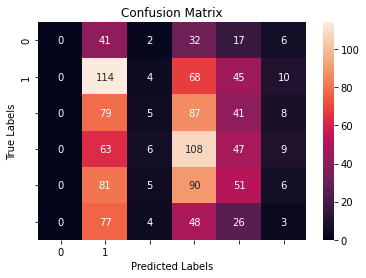

In [ ]:
print(classification_report(y_true=y_valid, y_pred=y_pred_valid))
plot_cm(y_valid,y_pred_valid,labels)

In [ ]:
clf.score(X_valid, y_valid)

0.2375316990701606

testing

In [ ]:
y_pred_test = clf.predict(X_test)

              precision    recall  f1-score   support

          -3       0.00      0.00      0.00        83
          -2       0.20      0.41      0.27       222
          -1       0.25      0.03      0.05       195
           1       0.21      0.35      0.26       246
           2       0.19      0.18      0.18       222
           3       0.22      0.07      0.10       199

    accuracy                           0.20      1167
   macro avg       0.18      0.17      0.14      1167
weighted avg       0.20      0.20      0.17      1167



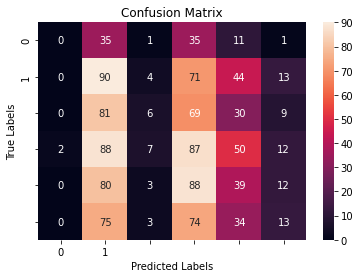

In [ ]:
print(classification_report(y_true=y_test, y_pred=y_pred_test))
plot_cm(y_test,y_pred_test,labels)

In [ ]:
clf.score(X_test, y_test)

0.20137103684661525

## Binary classification

In [ ]:
y_valid2 = [(1 if y_valid[i]>0 else 0) for i in range(len(y_valid))]
y_test2 = [(1 if y_test[i]>0 else 0) for i in range(len(y_test))]
y_train2 = [(1 if y_train[i]>0 else 0) for i in range(len(y_train))]

In [ ]:
clf = LogisticRegression(random_state=0, max_iter=10000).fit(X_train, y_train2)

validation

In [ ]:
y_pred_valid2 = clf.predict(X_valid)

In [ ]:
labels=[0,1]

              precision    recall  f1-score   support

           0       0.61      0.05      0.09       559
           1       0.53      0.97      0.69       624

    accuracy                           0.54      1183
   macro avg       0.57      0.51      0.39      1183
weighted avg       0.57      0.54      0.41      1183



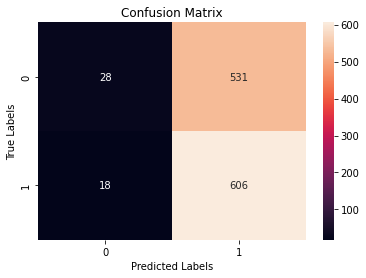

In [ ]:
print(classification_report(y_true=y_valid2, y_pred=y_pred_valid2))
plot_cm(y_valid2,y_pred_valid2,labels)

In [ ]:
clf.score(X_valid, y_valid2)

0.5393068469991547

testing

In [ ]:
y_pred_test2 = clf.predict(X_test)

              precision    recall  f1-score   support

           0       0.40      0.04      0.07       500
           1       0.57      0.96      0.72       667

    accuracy                           0.56      1167
   macro avg       0.49      0.50      0.39      1167
weighted avg       0.50      0.56      0.44      1167



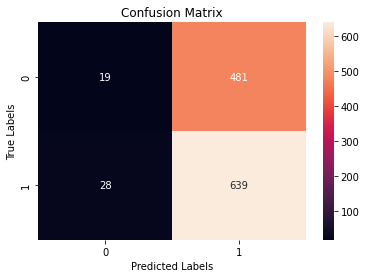

In [ ]:
print(classification_report(y_true=y_test2, y_pred=y_pred_test2))
plot_cm(y_test2,y_pred_test2,labels)

In [ ]:
clf.score(X_test, y_test2)

0.5638389031705227